### RandomForestClassifier 70%AUC

In [21]:
!pip install -U imblearn

import joblib
import pandas as pd
# import xgboost as xgb
# from sklearn import preprocessing
# from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from pycaret.classification import *

In [10]:
df0 = pd.read_csv("data_strokes_prediction.csv")

In [11]:
# transform
le = LabelEncoder()


def transform_df(df):

    df = df.drop(['id'], axis=1)  # drop useless column
    df = df.fillna(29.0) # fill null values with avg bmi
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    for col in cat_cols:
           le.fit(df[col])
           df[col] = le.transform(df[col]) #encode categories
    return df

df = transform_df(df0)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,29.0,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,29.0,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [4]:
# X,y
X,y = df.drop('stroke', axis = 1), df['stroke']

In [5]:
# undersample
rus = RandomUnderSampler(random_state=42) #sample coan be biased so test many times without random state
# rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X, y)

#oversample #OVERFITTING
# rus = RandomOverSampler() #sample coan be biased so test many times without random state
# # rus = RandomUnderSampler()
# X_res, y_res = rus.fit_resample(X, y)



In [6]:
#split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

#model
clf = RandomForestClassifier(random_state=0)

#fit
clf.fit(X_train, y_train)

#predict
y_pred = clf.predict(X_test)

In [7]:
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        51
           1       0.71      0.82      0.76        49

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.76      0.75      0.75       100

[[35 16]
 [ 9 40]]


### Pycaret

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# augment
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [17]:
train_data = pd.concat([X_train_res, y_train_res], axis=1)
s = setup(data=train_data, target='stroke', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(7802, 11)"
4,Transformed data shape,"(7802, 11)"
5,Transformed train set shape,"(5461, 11)"
6,Transformed test set shape,"(2341, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [28]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9529,0.9913,0.9638,0.9436,0.9535,0.9059,0.9063,0.0320
lightgbm,Light Gradient Boosting Machine,0.9482,0.9889,0.9619,0.9364,0.9489,0.8964,0.8969,0.1410
rf,Random Forest Classifier,0.9447,0.9884,0.9656,0.9269,0.9458,0.8894,0.8903,0.0430
et,Extra Trees Classifier,0.9361,0.9883,0.9608,0.9157,0.9377,0.8722,0.8734,0.0620
dt,Decision Tree Classifier,0.9050,0.9050,0.9227,0.8915,0.9067,0.8099,0.8106,0.0150
gbc,Gradient Boosting Classifier,0.8751,0.9510,0.9055,0.8537,0.8788,0.7502,0.7518,0.0240
knn,K Neighbors Classifier,0.8726,0.9380,0.9487,0.8236,0.8816,0.7451,0.7541,0.2880
ada,Ada Boost Classifier,0.8378,0.9239,0.8605,0.8232,0.8413,0.6755,0.6764,0.0230
qda,Quadratic Discriminant Analysis,0.8196,0.8973,0.8682,0.7916,0.8280,0.6393,0.6425,0.0250
ridge,Ridge Classifier,0.8121,0.0000,0.8444,0.7936,0.8181,0.6242,0.6257,0.0130


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [19]:
xg = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9525,0.9890,0.9380,0.9662,0.9519,0.9049,0.9053
1,0.9597,0.9950,0.9780,0.9435,0.9604,0.9194,0.9200
2,0.9359,0.9879,0.9487,0.9250,0.9367,0.8718,0.8721
3,0.9597,0.9911,0.9707,0.9498,0.9601,0.9194,0.9196
4,0.9560,0.9924,0.9597,0.9527,0.9562,0.9121,0.9121
5,0.9542,0.9922,0.9670,0.9429,0.9548,0.9084,0.9087
6,0.9524,0.9898,0.9634,0.9427,0.9529,0.9048,0.9050
7,0.9451,0.9902,0.9670,0.9263,0.9462,0.8901,0.8910
8,0.9615,0.9924,0.9670,0.9565,0.9617,0.9231,0.9231


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
scores = cross_val_score(xg, X_train_res, y_train_res, cv=20)

In [23]:
scores

array([0.67007673, 0.97442455, 0.98205128, 0.97692308, 0.96666667,
       0.97948718, 0.98717949, 0.96923077, 0.97948718, 0.96666667,
       0.96666667, 0.97179487, 0.96666667, 0.97948718, 0.97179487,
       0.97435897, 0.96153846, 0.97692308, 0.98205128, 0.97948718])

In [24]:
preds = predict_model(xg)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9551,0.9928,0.9632,0.9479,0.9555,0.9103,0.9104


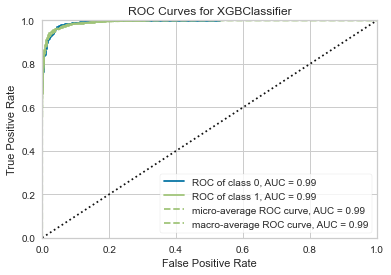

In [25]:
plot_model(xg)

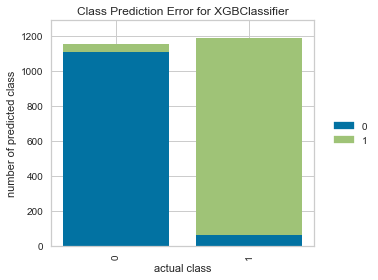

In [26]:
plot_model(xg, plot = 'error')

In [29]:
# save_model(best, 'best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\ariai\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['gender', 'age', 'hypertension',
                                              'heart_disease', 'ever_married',
                                              'work_type', 'Residence_type',
                                              'avg_glucose_level', 'bmi',
                                              'smoking_status'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=No...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=